In [ ]:
#!pip install GetOldTweets3

In [1]:
import GetOldTweets3 as got

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

### Getting some tweets from a specified handle

In [3]:
username = 'narendramodi'
start_date = '2020-01-01'
end_date = '2020-08-01'
count = 1000

In [4]:
tweetCriteria = got.manager.TweetCriteria().setUsername(username)\
                          .setTopTweets(True)\
                          .setSince(start_date)\
                          .setUntil(end_date)\
                          .setMaxTweets(count)

In [5]:
tweets = got.manager.TweetManager.getTweets(tweetCriteria)

In [6]:
text_tweets_namo = [[tweet.date,tweet.text,tweet.username,tweet.mentions] for tweet in tweets]

In [7]:
df_tweets_namo=pd.DataFrame(text_tweets_namo,columns=['DateTime','Text','Username','Mentions'])
df_tweets_namo.head()

,DateTime,Text,Username,Mentions
0,2020-07-31 13:29:33+00:00,The Smart India Hackathon has emerged as a vib...,narendramodi,
1,2020-07-31 13:28:19+00:00,Young India is filled with talent! The grand f...,narendramodi,
2,2020-07-30 10:36:52+00:00,Padma Shri Ren Sonam Tshering Lepcha Ji was a ...,narendramodi,
3,2020-07-30 06:47:04+00:00,Inaugurating the Supreme Court Building of Mau...,narendramodi,@PKJugnauth
4,2020-07-29 17:28:32+00:00,Another example of India-Mauritius friendship....,narendramodi,@MauritiusPM @PKJugnauth


In [8]:
df_tweets_namo.shape

(1000, 4)

In [28]:
from nltk.corpus import stopwords
stop_nltk = stopwords.words("english")

In [19]:
import re
def clean_tweet(tweet):
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet)
    #removing words like rt, amp, search string
    drop_list = ["rt",'amp', 'narendramodi']
    tokens = text.lower().strip().split()
    tokens_clean = [term for term in tokens if term not in drop_list and len(term)>2]
    return ' '.join(tokens_clean)

In [23]:
tweets_clean = [clean_tweet(txt) for txt in df_tweets_namo.Text.values]

In [25]:
tweets_clean[:20]

['the smart india hackathon has emerged vibrant forum ideate and innovate naturally this time our youth would focussing the post covid world their innovations along with ways create aatmanirbhar bharat',
 'young india filled with talent the grand finale the smart india hackathon 2020 showcases this very spirit innovation and excellence 1st august looking forward interacting with the finalists the hackathon and knowing more about their works',
 'padma shri ren sonam tshering lepcha was multi faceted personality made outstanding efforts popularise the great lepcha culture his works are respected across generations anguished his demise condolences his family and admirers shanti',
 'inaugurating the supreme court building mauritius with',
 'another example india mauritius friendship noon 30th july and would jointly inaugurate via video conferencing the new supreme court building mauritius india honoured have assisted this key project',
 'had extensive interaction with stakeholders from ban

In [26]:
tweets_combined = " ".join(tweets_clean)
tweets_combined[:500]

'the smart india hackathon has emerged vibrant forum ideate and innovate naturally this time our youth would focussing the post covid world their innovations along with ways create aatmanirbhar bharat young india filled with talent the grand finale the smart india hackathon 2020 showcases this very spirit innovation and excellence 1st august looking forward interacting with the finalists the hackathon and knowing more about their works padma shri ren sonam tshering lepcha was multi faceted person'

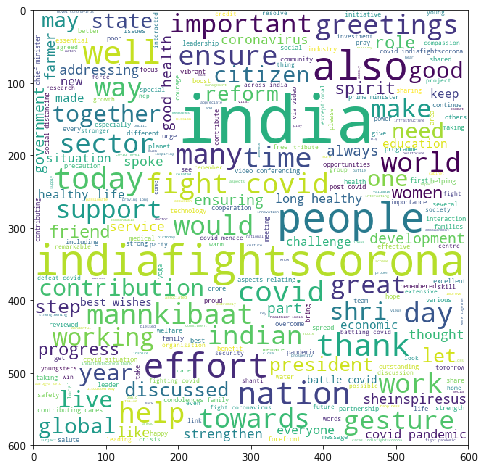

In [32]:
word_cloud=WordCloud(width=600, height=600, stopwords=stop_nltk,
                     background_color='white', max_words=300, normalize_plurals=True).generate_from_text(tweets_combined)
plt.figure(figsize=(8,8))
plt.imshow(word_cloud)
plt.show()

### Getting tweets for a specified query

In [ ]:
search_words = "coronavirus"
since_date = '2020-01-01'
until_date = '2020-09-13'
count = 1000

In [ ]:
tweetCriteria = got.manager.TweetCriteria().setQuerySearch(search_words).setSince(since_date).\
setUntil(until_date).setMaxTweets(count)

In [ ]:
tweets = got.manager.TweetManager.getTweets(tweetCriteria)

In [ ]:
text_tweets_covid = [[tweet.date,tweet.text,tweet.username,tweet.mentions] for tweet in tweets]

In [ ]:
df_tweets_covid=pd.DataFrame(text_tweets_covid,columns=['DateTime','Text','Username','Mentions'])
df_tweets_covid.head()

In [ ]:
tweets_raw = df_tweets_covid.Text.values

In [ ]:
len(tweets_raw)

In [ ]:
tweets_raw[:5]

### Cleaning up the tweets

In [ ]:
import re
def clean_tweet(tweet):
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet)
    #removing words like rt, amp, search string
    drop_list = ["rt",'amp', 'coronavirus']
    tokens = text.lower().strip().split()
    tokens_clean = [term for term in tokens if term not in drop_list and len(term)>2]
    return ' '.join(tokens_clean)

In [ ]:
tweets_clean = [clean_tweet(txt) for txt in tweets_raw]

In [ ]:
tweets_clean[0:20]

In [ ]:
tweets_combined = " ".join(tweets_clean)
tweets_combined[:500]

### Making the wordcloud

We see that there are a lot of functional words in the text (also called 'stopwords')
 - We can manually remove these
 - The wordcloud package automatically removes these for you

In [ ]:
from nltk.corpus import stopwords
stop_nltk = stopwords.words("english")

In [ ]:
word_cloud=WordCloud(width=600, height=600, stopwords=stop_nltk,
                     background_color='white', max_words=150, normalize_plurals=True).generate_from_text(tweets_combined)
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

## What are the sentiments of these tweets?

In [ ]:
# import nltk
# nltk.download('vader_lexicon')

In [ ]:
import pandas as pd #for dataframe handling
from nltk.sentiment.vader import SentimentIntensityAnalyzer
senti = SentimentIntensityAnalyzer()

In [ ]:
senti.polarity_scores("just heard the news")

In [ ]:
senti.polarity_scores("just heard the news smh")

In [ ]:
senti.polarity_scores("just heard the news lol")

#### Defining a function to get the compound score for a given tweet

In [ ]:
def get_sentiment_vader(tweet):
    return senti.polarity_scores(tweet)['compound']

In [ ]:
senti_score = [get_sentiment_vader(txt) for txt in tweets_clean]

In [ ]:
senti_score[:5]

In [ ]:
plt.hist(senti_score)
plt.show()

In [ ]:
def get_sentiment(tweet):
    polarity=senti.polarity_scores(tweet)
    if(polarity['compound']>=0.05):
        return "Positive"
    elif(polarity['compound']<=-0.05):
        return "Negative"
    else:
        return "Neutral"

##### Creating a dataframe with the tweets, to which we will add the sentiement classification

In [ ]:
df = pd.DataFrame({'tweet':tweets_clean})
df.head()

In [ ]:
df['sentiment'] = df.tweet.apply(get_sentiment)

In [ ]:
df.head()

In [ ]:
distr = df.sentiment.value_counts(normalize=True)
distr

##### Plotting - a pie chart of the sentiment classification

In [ ]:
fig, ax = plt.subplots(); ax.axis("equal")
ax.pie(distr.values,labels=list(distr.keys()),autopct='%1.1f')
plt.show()

### Wordcloud for negative tweets

In [ ]:
neg_tweets = df.tweet[df.sentiment=='Negative']
neg_tweets[5:10]

In [ ]:
neg_tweets_combined = " ".join(neg_tweets.values)

In [ ]:
neg_tweets_combined[:500]

In [ ]:
word_cloud=WordCloud(width=600,height=600,stopwords= stop_nltk,background_color='white',max_words=100,normalize_plurals=True,collocations=False).generate_from_text(" ".join(neg_tweets))
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(word_cloud)
plt.show()

In [ ]:
neg_tweets[neg_tweets.str.contains('trump')][:5]

In [ ]:
neg_tweets[neg_tweets.str.contains('republicans')]

### Wordcloud for positive tweets

In [ ]:
pos_tweets = df.tweet[df.sentiment=='Positive']
pos_tweets[:5]

In [ ]:
word_cloud=WordCloud(width=600,height=600,background_color='white',stopwords=stop_nltk,max_words=150,normalize_plurals=True,collocations=False).generate_from_text(" ".join(pos_tweets))
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(word_cloud)
plt.show()